# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from scipy.stats import ks_2samp

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


Nota-se que não há valores NaN no dataframe criado.

1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

#### O escript da análise da Tarefa 01 é:<br>
Criando a tabela com sex para inicío da análise<br>
tab = pd.crosstab(df['sex'], df['flag_doente'], margins=True)

Renomear os índices (sex: 0 → Female, 1 → Male)<br>
tab = tab.rename(index={0: 'Female', 1: 'Male'})

Renomear as colunas (flag_doente: 0 → No, 1 → Yes)<br>
tab = tab.rename(columns={0: 'No', 1: 'Yes'})

Criando as variávei:<br>
* Quantidade média de doentes<br>
tab['media_doentes'] = tab['Yes']/tab['All']<br>
* Odds<br>
tab['odds'] = tab['Yes']/tab['No']<br>
* Odds ratio<br>
tab['odds_ratio'] = tab['odds']/tab.loc['Male','odds']<br>
* Logito<br>
tab['logit'] = np.log(tab['odds'])<br>
* WOE<br>
tab['woe'] = np.log(tab['odds_ratio'])

display(tab)

fig, ax = plt.subplots(8,1,figsize=(10,50))<br>
sns.barplot(x='sex',y='No',data=tab, color = 'pink', ax=ax[0])<br>
sns.barplot(x='sex',y='Yes',data=tab, color = 'pink', ax=ax[1])<br>
sns.barplot(x='sex',y='All',data=tab, color = 'pink', ax=ax[2])<br>
sns.barplot(x='sex',y='media_doentes',data=tab, color = 'pink', ax=ax[3])<br>
sns.barplot(x='sex',y='odds',data=tab, color = 'pink', ax=ax[4])<br>
sns.barplot(x='sex',y='odds_ratio',data=tab, color = 'pink', ax=ax[5])<br>
sns.barplot(x='sex',y='logit',data=tab, color = 'pink', ax=ax[6])<br>
sns.barplot(x='sex',y='woe',data=tab, color = 'pink', ax=ax[7])<br>
sns.despine()

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

#### O escript da quebra<br>
Categorizando em age em 5 categorias<br>

df['cat_age'] = pd.qcut(df['age'], 5, duplicates='drop')<br>
df['cat_age'].value_counts().sort_index()


In [4]:
def quebra (df, var_exp):
    
    qb = 5
    
    print(f"Você selecionou a variável '{var_exp}', que será categorizada em {qb} grupos.")
    resp = input("Deseja selecionar uma quebra diferente? Responsa 'Sim' ou 'Não'").lower()
    
    if resp in ["sim", "s"]:
        try:
            qb = int(input("Em quantas partes deseja separar?"))
        except ValueError:
            print("Número inválido. Mantendo o valor default de 5.")
        
    df[var_exp] = pd.qcut(df[var_exp], qb, duplicates='drop')
    
    return df

In [5]:
def análise_bivariada (df):

    # Receber  variáveis
    
    print("As variáveis binárias do Dataframe são: sex, fbs, exang, flag_doente")
    var_resp = input ("Selecione a variável resposta desejada, ela deve ser binária:").lower()
    
    print("As variáveis do Dataframe são: age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num, flag_doente")
    var_exp = input ("Selecione a variável explicativa desejada:").lower()
###############################################################################################################################

    # Selecionando a Variável explicativa 

    if var_exp in ["age","trestbps", "chol", "thalach", "oldpeak"]:
        
        quebra(df, var_exp)

    if var_exp in ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "num", "flag_doente"]:

        df

    else:

        print ("Variável explicativa não válida.")
###############################################################################################################################
   
    # Criar tabela 
    
    tab = pd.crosstab(df[var_exp], df[var_resp], margins=True)
      
###############################################################################################################################  

    # Conferindo a variável resposta

    colunas_resp = [col for col in tab.columns if col not in ['All']]
    if len(colunas_resp) != 2:
        print("Erro: variável resposta precisa ser binária")
        return

    col_0 = colunas_resp[0]
    col_1 = colunas_resp[1]
###############################################################################################################################

    #Criando variáveis
    
    # Quantidade média de doentes
    tab['media_doentes'] = tab[col_1]/tab['All']
    # Odds
    tab['odds'] = tab[col_1]/tab[col_0]
    # Odds ratio
    gp_ref = tab.index[0]
    tab['odds_ratio'] = tab['odds']/tab.loc[gp_ref,'odds']
    # Logito
    tab['logit'] = np.log(tab['odds'])
    # WOE
    tab['woe'] = np.log(tab['odds_ratio'])
###############################################################################################################################

    # Plotando gráficos
    
    fig, ax = plt.subplots(8,1,figsize=(10,50))
    sns.barplot(x=var_exp,y=col_0, data=tab, color = 'pink', ax=ax[0])
    sns.barplot(x=var_exp,y=col_1, data=tab, color = 'pink', ax=ax[1])
    sns.barplot(x=var_exp,y='All', data=tab, color = 'pink', ax=ax[2])
    sns.barplot(x=var_exp,y='media_doentes', data=tab, color = 'pink', ax=ax[3])
    sns.barplot(x=var_exp,y='odds', data=tab, color = 'pink', ax=ax[4])
    sns.barplot(x=var_exp,y='odds_ratio', data=tab, color = 'pink', ax=ax[5])
    sns.barplot(x=var_exp,y='logit', data=tab, color = 'pink', ax=ax[6])
    sns.barplot(x=var_exp,y='woe', data=tab, color = 'pink', ax=ax[7])
    sns.despine()

    return tab

As variáveis binárias do Dataframe são: sex, fbs, exang, flag_doente


Selecione a variável resposta desejada, ela deve ser binária: fbs


As variáveis do Dataframe são: age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num, flag_doente


Selecione a variável explicativa desejada: chol


Você selecionou a variável 'chol', que será categorizada em 5 grupos.


Deseja selecionar uma quebra diferente? Responsa 'Sim' ou 'Não' Não


Variável explicativa não válida.


fbs,0.0,1.0,All,media_doentes,odds,odds_ratio,logit,woe
chol,,,,,,,,
"(125.999, 204.0]",53,9,62,0.145161,0.169811,1.000000,-1.773067,0.000000
"(204.0, 230.0]",52,8,60,0.133333,0.153846,0.905983,-1.871802,-0.098735
"(230.0, 254.0]",52,10,62,0.161290,0.192308,1.132479,-1.648659,0.124409
"(254.0, 286.0]",51,8,59,0.135593,0.156863,0.923747,-1.852384,-0.079317
"(286.0, 564.0]",50,10,60,0.166667,0.200000,1.177778,-1.609438,0.163629
All,258,45,303,0.148515,0.174419,1.027132,-1.746297,0.026770


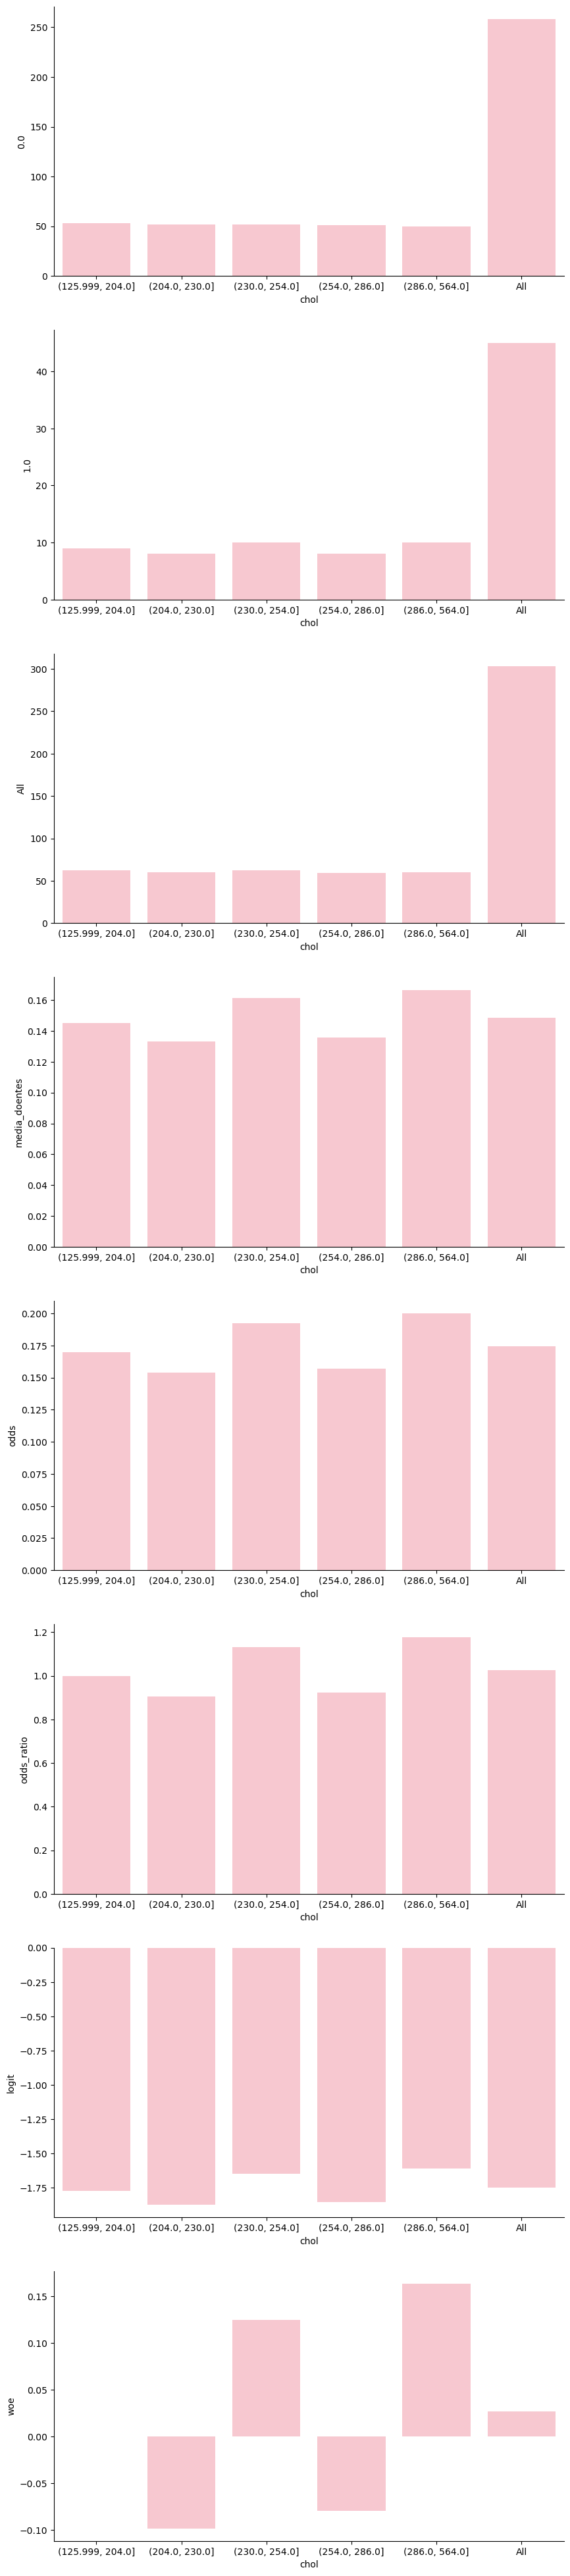

In [6]:
análise_bivariada(df)

As variáveis binárias do Dataframe são: sex, fbs, exang, flag_doente


Selecione a variável resposta desejada, ela deve ser binária: fbs


As variáveis do Dataframe são: age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num, flag_doente


Selecione a variável explicativa desejada: ca


fbs,0.0,1.0,All,media_doentes,odds,odds_ratio,logit,woe
ca,,,,,,,,
0.0,156,20,176,0.113636,0.128205,1.000000,-2.054124,0.000000
1.0,56,9,65,0.138462,0.160714,1.253571,-1.828127,0.225997
2.0,28,10,38,0.263158,0.357143,2.785714,-1.029619,1.024504
3.0,15,5,20,0.250000,0.333333,2.600000,-1.098612,0.955511
?,3,1,4,0.250000,0.333333,2.600000,-1.098612,0.955511
All,258,45,303,0.148515,0.174419,1.360465,-1.746297,0.307827


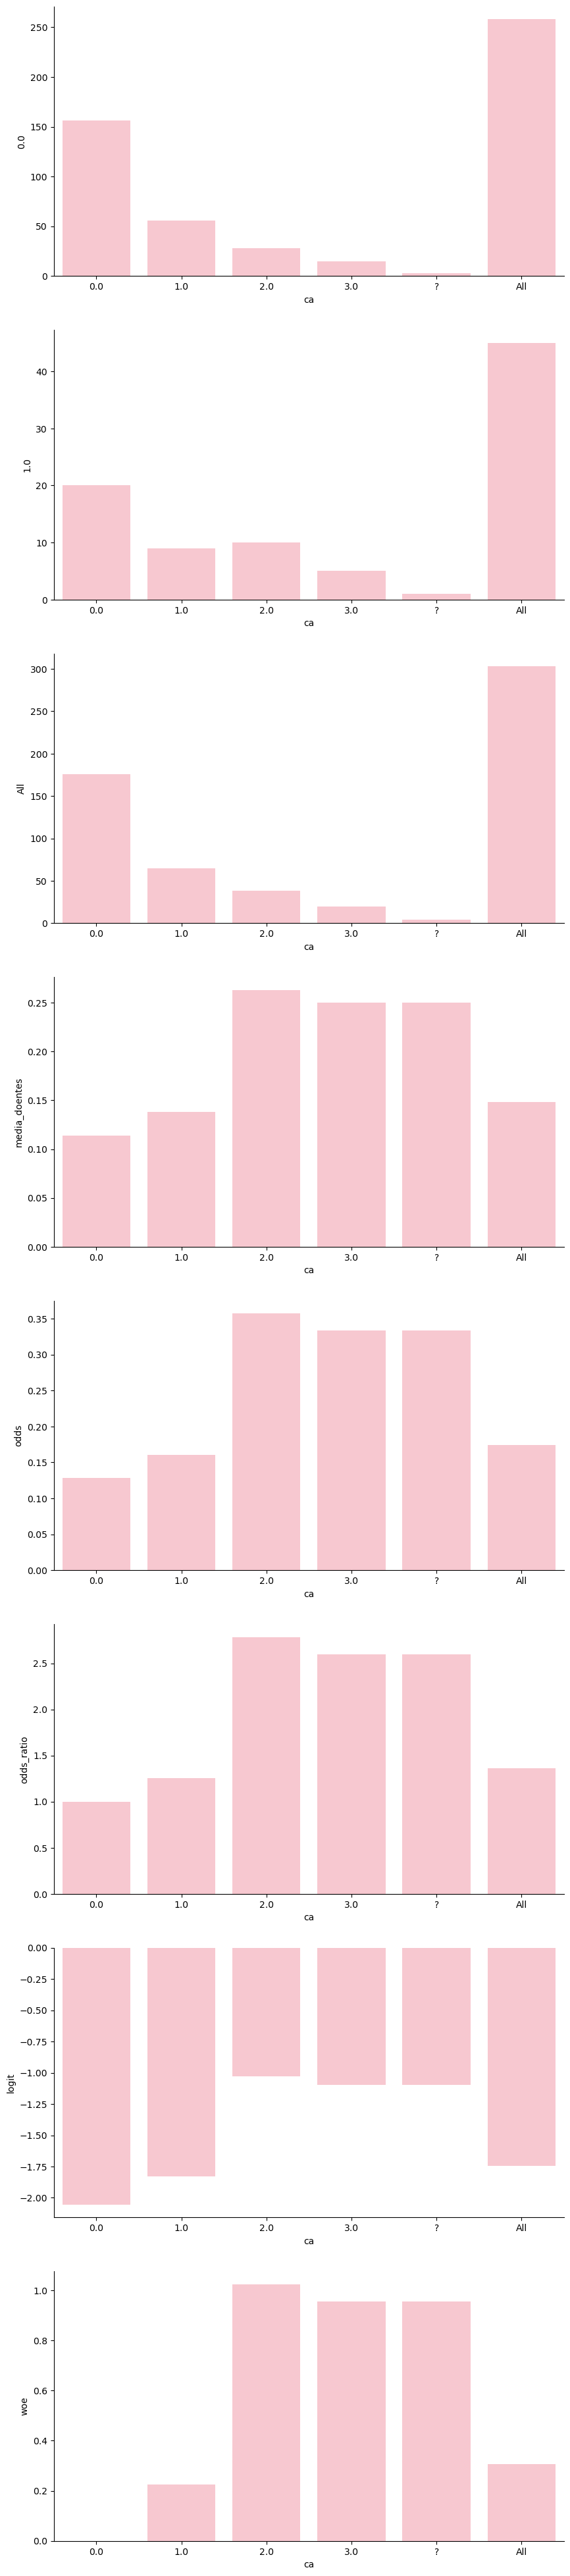

In [7]:
análise_bivariada(df)

As variáveis binárias do Dataframe são: sex, fbs, exang, flag_doente


Selecione a variável resposta desejada, ela deve ser binária: fbs


As variáveis do Dataframe são: age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num, flag_doente


Selecione a variável explicativa desejada: oldpeak


Você selecionou a variável 'oldpeak', que será categorizada em 5 grupos.


Deseja selecionar uma quebra diferente? Responsa 'Sim' ou 'Não' Sim
Em quantas partes deseja separar? 7


Variável explicativa não válida.


fbs,0.0,1.0,All,media_doentes,odds,odds_ratio,logit,woe
oldpeak,,,,,,,,
"(-0.001, 0.443]",113,17,130,0.130769,0.150442,1.000000,-1.894174,0.000000
"(0.443, 1.0]",40,10,50,0.200000,0.250000,1.661765,-1.386294,0.507880
"(1.0, 1.5]",33,5,38,0.131579,0.151515,1.007130,-1.887070,0.007105
"(1.5, 2.3]",35,7,42,0.166667,0.200000,1.329412,-1.609438,0.284737
"(2.3, 6.2]",37,6,43,0.139535,0.162162,1.077901,-1.819158,0.075016
All,258,45,303,0.148515,0.174419,1.159371,-1.746297,0.147877


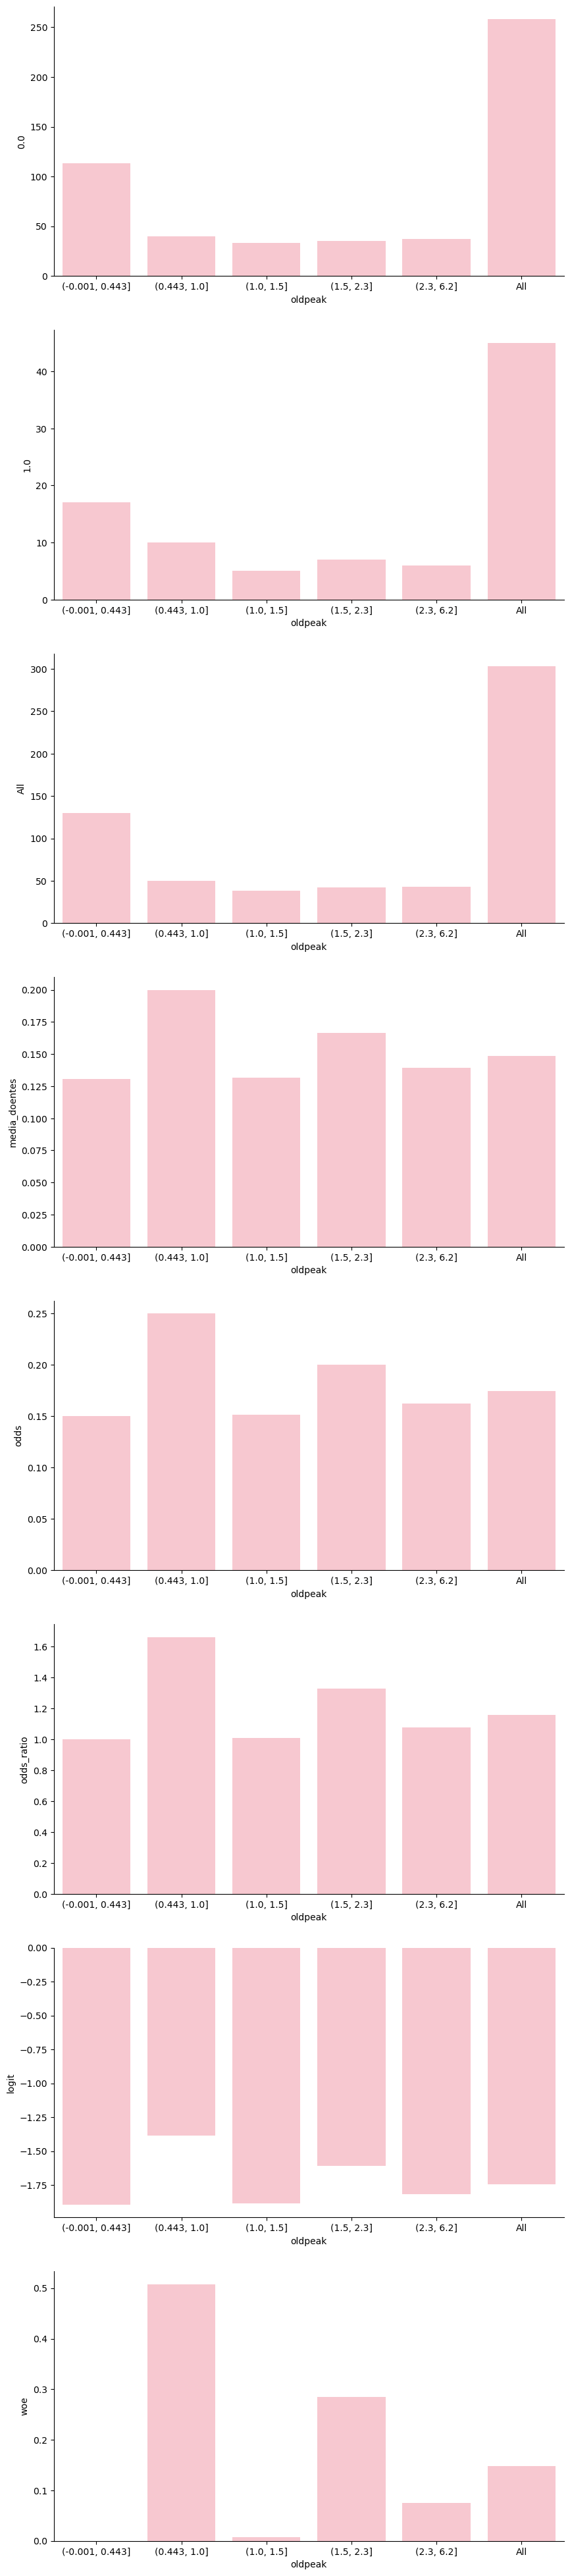

In [8]:
análise_bivariada(df)

3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [9]:
reg_log = smf.logit("flag_doente ~ sex + cp + trestbps + age",data=df).fit()
title1 = "Modelo 1: flag_doente ~ sex + cp + trestbps + age"
print(title1)
reg_log.summary()

Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6
Modelo 1: flag_doente ~ sex + cp + trestbps + age


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Sun, 06 Apr 2025   Pseudo R-squ.:                  0.2605
Time:                        04:48:48   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1167      1.608     -6.915      0.000     -14.267      -7.966
sex            1.8021      0.331      5.444      0.000       1.153       2.451
cp             1.1403      0.169      6.739      0.000       0.809       1.472
trestbps       0.0214      0.008      2.600      0.009       0.005       0.037
age            0.0582      0.017      3.348      0.001       0.024       0.092
==============================================================================
"""

In [10]:
df["trestbps_mean"] = df.groupby("sex")["trestbps"].transform("mean")
reg_log2 = smf.logit("flag_doente ~ C(sex) + cp + trestbps_mean + age",data=df).fit()
title2 = "Modelo 2: flag_doente ~ C(sex) + cp + Média de pressão sanguínea por sexo+ age"
print(title2)
reg_log2.summary()

Optimization terminated successfully.
         Current function value: 0.521721
         Iterations 23
Modelo 2: flag_doente ~ C(sex) + cp + Média de pressão sanguínea por sexo+ age


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Sun, 06 Apr 2025   Pseudo R-squ.:                  0.2436
Time:                        04:48:49   Log-Likelihood:                -158.08
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 4.031e-21
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0276   6.88e+06   4.02e-09      1.000   -1.35e+07    1.35e+07
C(sex)[T.1.0]     1.5486   1.25e+05   1.24e-05      1.000   -2.45e+05    2.45e+05
cp                1.0966      0.167      6.575      0.000       0.770       1.423
trestbps_mean    -0.0649   5.16e+04  -1.26e-06      1.000   -1.01e+05    1.01e+05
age               0.0682      0.017      4.039      0.000       0.035       0.101
=================================================================================
"""

In [11]:
reg_log3 = smf.logit("flag_doente ~ sex + C(cp) + trestbps + age",data=df).fit()
title3 = "Modelo 3: flag_doente ~ sex + C(cp)+ trestbps + age"
print(title3)
reg_log3.summary()

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6
Modelo 3: flag_doente ~ sex + C(cp)+ trestbps + age


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Sun, 06 Apr 2025   Pseudo R-squ.:                  0.3097
Time:                        04:49:08   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.3407      1.621     -5.145      0.000     -11.518      -5.163
C(cp)[T.2.0]    -0.0617      0.636     -0.097      0.923      -1.309       1.186
C(cp)[T.3.0]     0.0715      0.573      0.125      0.901      -1.051       1.194
C(cp)[T.4.0]     2.4789      0.553      4.485      0.000       1.396       3.562
sex              1.8094      0.353      5.130      0.000       1.118       2.501
trestbps         0.0193      0.009      2.261      0.024       0.003       0.036
age              0.0567      0.018      3.120      0.002       0.021       0.092
================================================================================
"""

In [12]:
df["age_mean"] = df.groupby("cp")["age"].transform("mean")
reg_log4 = smf.logit("flag_doente ~ sex + cp + trestbps + age_mean",data=df).fit()
title4 = "Modelo 4: flag_doente ~ sex + cp + trestbps + Média da idade por cp"
print(title4)
reg_log4.summary()

Optimization terminated successfully.
         Current function value: 0.511310
         Iterations 6
Modelo 4: flag_doente ~ sex + cp + trestbps + Média da idade por cp


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Sun, 06 Apr 2025   Pseudo R-squ.:                  0.2587
Time:                        04:49:28   Log-Likelihood:                -154.93
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.824e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.4545      6.186     -4.600      0.000     -40.579     -16.330
sex            1.5882      0.324      4.905      0.000       0.954       2.223
cp             0.7739      0.175      4.416      0.000       0.430       1.117
trestbps       0.0248      0.008      3.069      0.002       0.009       0.041
age_mean       0.3921      0.116      3.369      0.001       0.164       0.620
==============================================================================
"""

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

#### Mesmo que valesse a pena utilizar apenas o modelo 3, por questão de estudo utilizarei todos os modelos anteriores 

In [13]:
# Probabilidade predita para cada modelo anteriormente calculado
df['predito'] = reg_log.predict(df)
df['predito2'] = reg_log2.predict(df)
df['predito3'] = reg_log3.predict(df)
df['predito4'] = reg_log4.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,num,flag_doente,trestbps_mean,age_mean,predito,predito2,predito3,predito4
0,63.0,1.0,1.0,145.0,"(230.0, 254.0]",1.0,2.0,150.0,0.0,"(1.5, 2.3]",...,0.0,6.0,0,0,130.912621,55.869565,0.196041,0.178500,0.458229,0.355729
1,67.0,1.0,4.0,160.0,"(254.0, 286.0]",0.0,2.0,108.0,1.0,"(1.0, 1.5]",...,3.0,3.0,2,1,130.912621,55.722222,0.928431,0.884532,0.944123,0.885110
2,67.0,1.0,4.0,120.0,"(204.0, 230.0]",0.0,2.0,129.0,1.0,"(2.3, 6.2]",...,2.0,7.0,1,1,130.912621,55.722222,0.846558,0.884532,0.886566,0.740791
3,37.0,1.0,3.0,130.0,"(230.0, 254.0]",0.0,0.0,187.0,0.0,"(2.3, 6.2]",...,0.0,3.0,0,0,130.912621,53.697674,0.276207,0.248409,0.134929,0.433007
4,41.0,0.0,2.0,130.0,"(125.999, 204.0]",0.0,2.0,172.0,0.0,"(1.0, 1.5]",...,0.0,3.0,0,0,133.340206,51.360000,0.024768,0.025656,0.027278,0.027974


In [14]:
# Categorizando em 5 grupos para cada modelo anteriormente calculado
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
print(title1)
display(cat_pred.value_counts().sort_index())
print("-"*120)

cat_pred2 = pd.qcut(df['predito2'], 5, duplicates='drop')
print(title2)
display(cat_pred2.value_counts().sort_index())
print("-"*120)

cat_pred3 = pd.qcut(df['predito3'], 5, duplicates='drop')
print(title3)
display(cat_pred3.value_counts().sort_index())
print("-"*120)

cat_pred4 = pd.qcut(df['predito4'], 5, duplicates='drop')
print(title4)
display(cat_pred4.value_counts().sort_index())

Modelo 1: flag_doente ~ sex + cp + trestbps + age


predito
(0.0119, 0.146]    61
(0.146, 0.349]     60
(0.349, 0.575]     61
(0.575, 0.772]     60
(0.772, 0.928]     61
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
Modelo 2: flag_doente ~ C(sex) + cp + Média de pressão sanguínea por sexo+ age


predito2
(0.015099999999999999, 0.16]    61
(0.16, 0.348]                   60
(0.348, 0.551]                  61
(0.551, 0.759]                  62
(0.759, 0.938]                  59
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
Modelo 3: flag_doente ~ sex + C(cp)+ trestbps + age


predito3
(0.0131, 0.143]    62
(0.143, 0.287]     59
(0.287, 0.586]     62
(0.586, 0.822]     59
(0.822, 0.944]     61
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
Modelo 4: flag_doente ~ sex + cp + trestbps + Média da idade por cp


predito4
(0.0142, 0.123]    64
(0.123, 0.388]     57
(0.388, 0.556]     66
(0.556, 0.764]     58
(0.764, 0.908]     58
Name: count, dtype: int64

In [15]:
# Probabilidade de evento médio para cada modelo anteriormente calculado
group_reg = df.groupby(cat_pred)
qualid = group_reg[['age']].count().rename(columns = {'age': 'contagem'})
qualid['predito'] = group_reg['predito'].mean()
print(title1)
display(qualid)
print("-"*120)

group_reg2 = df.groupby(cat_pred2)
qualid2 = group_reg2[['age']].count().rename(columns = {'age': 'contagem'})
qualid2['predito'] = group_reg2['predito2'].mean()
print(title2)
display(qualid2)
print("-"*120)

group_reg3 = df.groupby(cat_pred3)
qualid3 = group_reg3[['age']].count().rename(columns = {'age': 'contagem'})
qualid3['predito'] = group_reg3['predito3'].mean()
print(title3)
display(qualid3)
print("-"*120)

group_reg4 = df.groupby(cat_pred4)
qualid4 = group_reg4[['age']].count().rename(columns = {'age': 'contagem'})
qualid4['predito'] = group_reg4['predito4'].mean()
print(title4)
display(qualid4)

Modelo 1: flag_doente ~ sex + cp + trestbps + age


C:\Users\marin\AppData\Local\Temp\ipykernel_29692\1496188368.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_reg = df.groupby(cat_pred)


,contagem,predito
predito,,
"(0.0119, 0.146]",61,0.076255
"(0.146, 0.349]",60,0.249060
"(0.349, 0.575]",61,0.457982
"(0.575, 0.772]",60,0.673059
"(0.772, 0.928]",61,0.837449


------------------------------------------------------------------------------------------------------------------------
Modelo 2: flag_doente ~ C(sex) + cp + Média de pressão sanguínea por sexo+ age


C:\Users\marin\AppData\Local\Temp\ipykernel_29692\1496188368.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_reg2 = df.groupby(cat_pred2)


,contagem,predito
predito2,,
"(0.015099999999999999, 0.16]",61,0.087593
"(0.16, 0.348]",60,0.257834
"(0.348, 0.551]",61,0.458415
"(0.551, 0.759]",62,0.662438
"(0.759, 0.938]",59,0.833089


------------------------------------------------------------------------------------------------------------------------
Modelo 3: flag_doente ~ sex + C(cp)+ trestbps + age


C:\Users\marin\AppData\Local\Temp\ipykernel_29692\1496188368.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_reg3 = df.groupby(cat_pred3)


,contagem,predito
predito3,,
"(0.0131, 0.143]",62,0.072008
"(0.143, 0.287]",59,0.209626
"(0.287, 0.586]",62,0.435175
"(0.586, 0.822]",59,0.708861
"(0.822, 0.944]",61,0.874819


------------------------------------------------------------------------------------------------------------------------
Modelo 4: flag_doente ~ sex + cp + trestbps + Média da idade por cp


C:\Users\marin\AppData\Local\Temp\ipykernel_29692\1496188368.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_reg4 = df.groupby(cat_pred4)


,contagem,predito
predito4,,
"(0.0142, 0.123]",64,0.080916
"(0.123, 0.388]",57,0.247314
"(0.388, 0.556]",66,0.466507
"(0.556, 0.764]",58,0.709842
"(0.764, 0.908]",58,0.823520


In [16]:
# Taxa de evento por grupo para cada modelo anteriormente calculado
qualid['predito'] = group_reg['predito'].mean()
qualid['pct_age'] = group_reg['age'].mean()
print(title1)
display(qualid)
print("-"*120)

qualid2['predito'] = group_reg2['predito'].mean()
qualid2['pct_age'] = group_reg2['age'].mean()
print(title2)
display(qualid2)
print("-"*120)

qualid3['predito'] = group_reg3['predito'].mean()
qualid3['pct_age'] = group_reg3['age'].mean()
print(title3)
display(qualid3)
print("-"*120)

qualid4['predito'] = group_reg4['predito'].mean()
qualid4['pct_age'] = group_reg4['age'].mean()
print(title4)
display(qualid4)

Modelo 1: flag_doente ~ sex + cp + trestbps + age


,contagem,predito,pct_age
predito,,,
"(0.0119, 0.146]",61,0.076255,48.377049
"(0.146, 0.349]",60,0.249060,54.150000
"(0.349, 0.575]",61,0.457982,54.180328
"(0.575, 0.772]",60,0.673059,54.350000
"(0.772, 0.928]",61,0.837449,61.131148


------------------------------------------------------------------------------------------------------------------------
Modelo 2: flag_doente ~ C(sex) + cp + Média de pressão sanguínea por sexo+ age


,contagem,predito,pct_age
predito2,,,
"(0.015099999999999999, 0.16]",61,0.086406,47.901639
"(0.16, 0.348]",60,0.252777,54.400000
"(0.348, 0.551]",61,0.471290,55.557377
"(0.551, 0.759]",62,0.658287,53.403226
"(0.759, 0.938]",59,0.830512,61.169492


------------------------------------------------------------------------------------------------------------------------
Modelo 3: flag_doente ~ sex + C(cp)+ trestbps + age


,contagem,predito,pct_age
predito3,,,
"(0.0131, 0.143]",62,0.104666,49.741935
"(0.143, 0.287]",59,0.290250,51.355932
"(0.287, 0.586]",62,0.432868,57.951613
"(0.586, 0.822]",59,0.637892,52.728814
"(0.822, 0.944]",61,0.834632,60.278689


------------------------------------------------------------------------------------------------------------------------
Modelo 4: flag_doente ~ sex + cp + trestbps + Média da idade por cp


,contagem,predito,pct_age
predito4,,,
"(0.0142, 0.123]",64,0.120571,51.640625
"(0.123, 0.388]",57,0.257512,54.859649
"(0.388, 0.556]",66,0.449562,54.469697
"(0.556, 0.764]",58,0.692685,55.500000
"(0.764, 0.908]",58,0.806180,56.017241


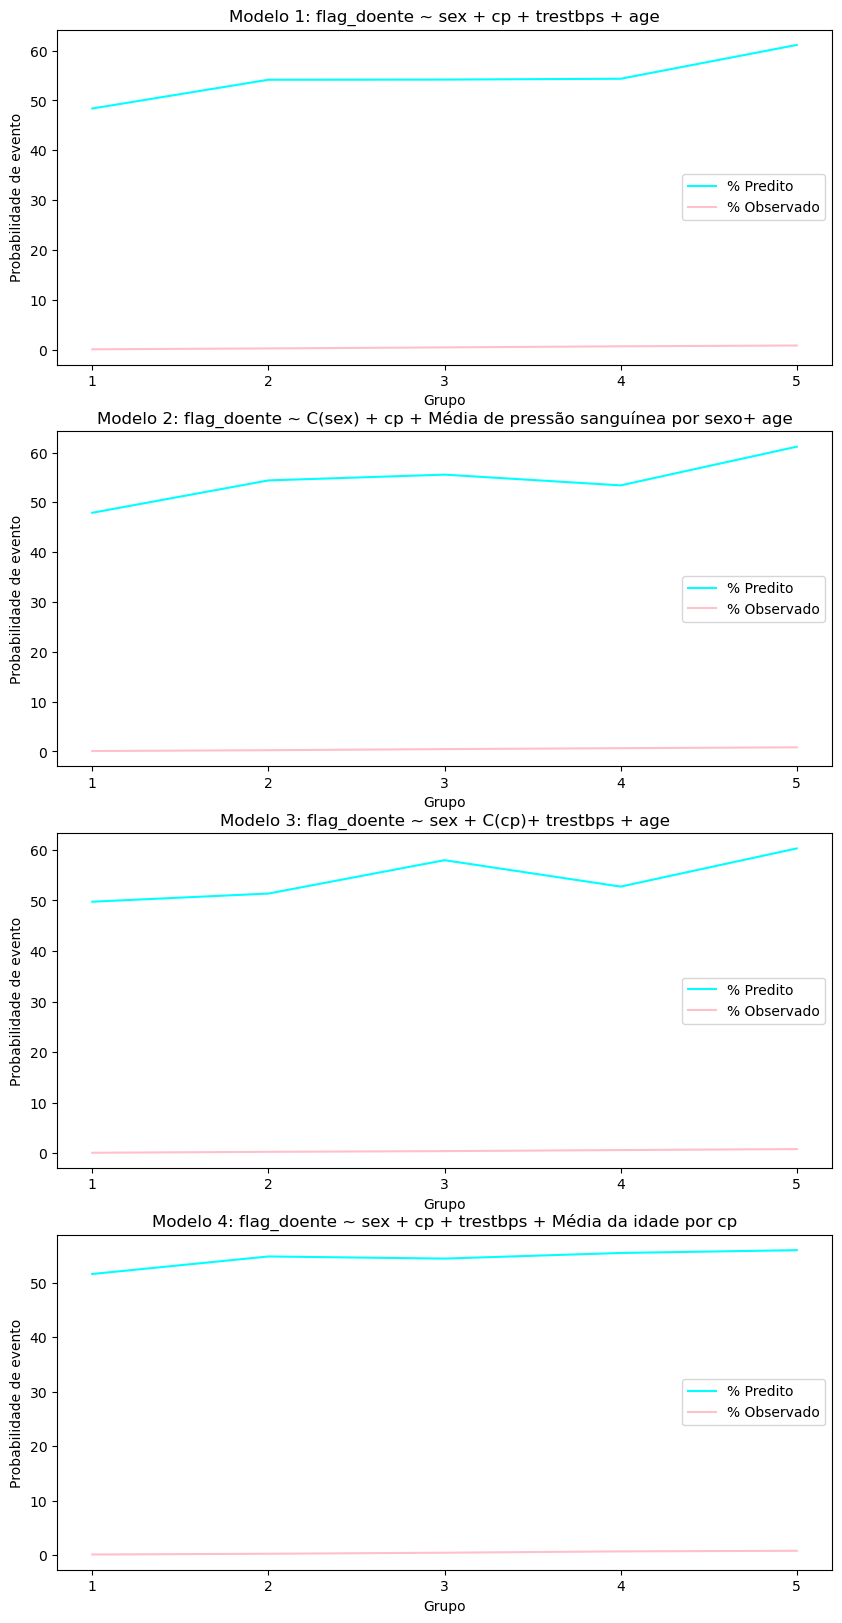

<Figure size 640x480 with 0 Axes>

In [17]:
# Gráfico valor esperado x valor observado por grupo para cada modelo anteriormente calculado
titles = [title1, title2, title3, title4]
qualids = [qualid, qualid2, qualid3, qualid4]
indices = [0, 1, 2, 3]

fig, ax = plt.subplots(4,1,figsize=(10,20))
fig = plt.figure()
ax = ax.flatten()

for i in indices:
    qualid = qualids[i]
    
    # Plotar as duas séries no mesmo eixo
    qualid['pct_age'].plot(ax=ax[i], label='% Predito', color='cyan')
    qualid['predito'].plot(ax=ax[i], label='% Observado', color='pink')

    # Configurar título, rótulos e ticks para cada eixo
    ax[i].set_title(titles[i])
    ax[i].set_xticks([0, 1, 2, 3, 4])
    ax[i].set_xticklabels([1, 2, 3, 4, 5])
    ax[i].set_ylabel('Probabilidade de evento')
    ax[i].set_xlabel('Grupo')
    ax[i].legend(loc="right")

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [18]:
def avaliacao (df, _var_, preditivo):
    
    #Acurácia
    acc = metrics.accuracy_score(df[_var_], df[preditivo]>.5)
    print('Acurácia: {0:.2f}%'.format(acc*100))
    
    #Gini
    fpr, tpr, thresholds = metrics.roc_curve(df[_var_], df[preditivo])
    auc_ = metrics.auc(fpr, tpr)    
    gini = 2*auc_ -1
    
    #KS
    ks = ks_2samp(df.loc[df[_var_] == 1, preditivo], df.loc[df[_var_] != 1, preditivo]).statistic
    
    print('KS: {0:.2f}% \nGINI: {1:.2f}%'.format(ks*100, gini*100))
    return

In [19]:
preditos = ['predito', 'predito2', 'predito3', 'predito4']

for i in indices:
    predito = preditos[i]
    titulo = print(titles[i])
    avaliacao(df, 'flag_doente', predito)
    print("-"*120)

Modelo 1: flag_doente ~ sex + cp + trestbps + age
Acurácia: 77.89%
KS: 58.40% 
GINI: 66.22%
------------------------------------------------------------------------------------------------------------------------
Modelo 2: flag_doente ~ C(sex) + cp + Média de pressão sanguínea por sexo+ age
Acurácia: 74.26%
KS: 52.90% 
GINI: 64.08%
------------------------------------------------------------------------------------------------------------------------
Modelo 3: flag_doente ~ sex + C(cp)+ trestbps + age
Acurácia: 79.54%
KS: 59.30% 
GINI: 70.39%
------------------------------------------------------------------------------------------------------------------------
Modelo 4: flag_doente ~ sex + cp + trestbps + Média da idade por cp
Acurácia: 77.23%
KS: 55.53% 
GINI: 65.27%
------------------------------------------------------------------------------------------------------------------------


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [20]:
def modelagem_logit (df, modelo):

    reg_log = smf.logit( modelo ,data=df).fit()
    title = "Modelo: " + modelo[1:]
    print(title)
    display(reg_log.summary())
    
    df['predito'] = reg_log.predict(df)
    display(df.head())

    var_cat = input("Qual variável deve ser categorizada?").lower()
    grupos = int(input("Em quantos grupos a probabilidade deve ser categorizada?"))

    if df['predito'].dtype == 'O':
        df['predito'] = pd.to_numeric(df['predito'], errors='coerce')
        
    cat_pred = pd.qcut(df['predito'], grupos, duplicates='drop')
    group_reg = df.groupby(cat_pred)

    qualid = group_reg[[var_cat]].count().rename(columns={var_cat: 'contagem'})
    qualid['predito'] = group_reg['predito'].mean()
    qualid['pct_'] = group_reg[var_cat].mean()

    display(qualid)

    # Gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    qualid['pct_'].plot(ax=ax, label='% Observado', color='pink')
    qualid['predito'].plot(ax=ax, label='% Predito', color='cyan')
    ax.set_xticks(range(grupos))
    ax.set_xticklabels([str(i+1) for i in range(grupos)])
    ax.set_ylabel('Probabilidade de evento')
    ax.set_xlabel('Grupo')
    ax.legend(loc="lower right")
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

    # Avaliação
    _var_ = modelo.split("~")[0].strip()
    print("Avaliação do Modelo:")
    avaliacao(df, _var_, predito)

Optimization terminated successfully.
         Current function value: 0.484937
         Iterations 6
Modelo: lag_doente ~ sex + C(cp) + age


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Sun, 06 Apr 2025   Pseudo R-squ.:                  0.2969
Time:                        04:51:52   Log-Likelihood:                -146.94
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 4.225e-25
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -6.0793      1.236     -4.920      0.000      -8.501      -3.658
C(cp)[T.2.0]    -0.2530      0.618     -0.410      0.682      -1.464       0.958
C(cp)[T.3.0]    -0.1043      0.556     -0.188      0.851      -1.194       0.985
C(cp)[T.4.0]     2.2726      0.532      4.269      0.000       1.229       3.316
sex              1.7195      0.343      5.008      0.000       1.047       2.392
age              0.0666      0.018      3.770      0.000       0.032       0.101
================================================================================
"""

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,num,flag_doente,trestbps_mean,age_mean,predito,predito2,predito3,predito4
0,63.0,1.0,1.0,145.0,"(230.0, 254.0]",1.0,2.0,150.0,0.0,"(1.5, 2.3]",...,0.0,6.0,0,0,130.912621,55.869565,0.459254,0.178500,0.458229,0.355729
1,67.0,1.0,4.0,160.0,"(254.0, 286.0]",0.0,2.0,108.0,1.0,"(1.0, 1.5]",...,3.0,3.0,2,1,130.912621,55.722222,0.914958,0.884532,0.944123,0.885110
2,67.0,1.0,4.0,120.0,"(204.0, 230.0]",0.0,2.0,129.0,1.0,"(2.3, 6.2]",...,2.0,7.0,1,1,130.912621,55.722222,0.914958,0.884532,0.886566,0.740791
3,37.0,1.0,3.0,130.0,"(230.0, 254.0]",0.0,0.0,187.0,0.0,"(2.3, 6.2]",...,0.0,3.0,0,0,130.912621,53.697674,0.119250,0.248409,0.134929,0.433007
4,41.0,0.0,2.0,130.0,"(125.999, 204.0]",0.0,2.0,172.0,0.0,"(1.0, 1.5]",...,0.0,3.0,0,0,133.340206,51.360000,0.026564,0.025656,0.027278,0.027974


Qual variável deve ser categorizada? age
Em quantos grupos a probabilidade deve ser categorizada? 5


C:\Users\marin\AppData\Local\Temp\ipykernel_29692\788166499.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_reg = df.groupby(cat_pred)


,contagem,predito,pct_
predito,,,
"(0.015799999999999998, 0.151]",61,0.079034,48.852459
"(0.151, 0.296]",61,0.222489,51.704918
"(0.296, 0.559]",60,0.425583,59.166667
"(0.559, 0.819]",62,0.699826,51.645161
"(0.819, 0.954]",59,0.875981,61.169492


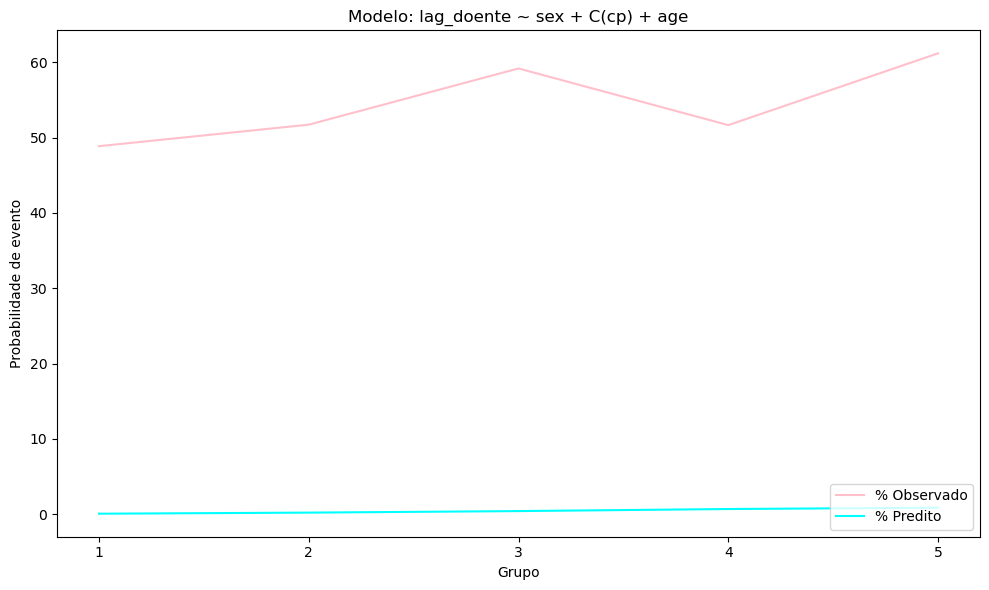

Avaliação do Modelo:
Acurácia: 77.23%
KS: 55.53% 
GINI: 65.27%


In [21]:
modelagem_logit(df, "flag_doente ~ sex + C(cp) + age")

Optimization terminated successfully.
         Current function value: 0.422677
         Iterations 7
Modelo: lag_doente ~ sex + C(cp) + age + ca


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            9
Date:                Sun, 06 Apr 2025   Pseudo R-squ.:                  0.3872
Time:                        04:52:06   Log-Likelihood:                -128.07
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 3.079e-30
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.5326      1.314     -3.450      0.001      -7.107      -1.958
C(cp)[T.2.0]    -0.2274      0.669     -0.340      0.734      -1.538       1.083
C(cp)[T.3.0]    -0.2877      0.626     -0.460      0.646      -1.514       0.938
C(cp)[T.4.0]     2.1327      0.585      3.647      0.000       0.986       3.279
ca[T.1.0]        1.8148      0.418      4.338      0.000       0.995       2.635
ca[T.2.0]        2.1934      0.551      3.980      0.000       1.113       3.274
ca[T.3.0]        2.3325      0.721      3.234      0.001       0.919       3.746
ca[T.?]         -0.0333      1.321     -0.025      0.980      -2.622       2.556
sex              1.6058      0.372      4.314      0.000       0.876       2.335
age              0.0276      0.019      1.423      0.155      -0.010       0.066
================================================================================
"""

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,num,flag_doente,trestbps_mean,age_mean,predito,predito2,predito3,predito4
0,63.0,1.0,1.0,145.0,"(230.0, 254.0]",1.0,2.0,150.0,0.0,"(1.5, 2.3]",...,0.0,6.0,0,0,130.912621,55.869565,0.234052,0.178500,0.458229,0.355729
1,67.0,1.0,4.0,160.0,"(254.0, 286.0]",0.0,2.0,108.0,1.0,"(1.0, 1.5]",...,3.0,3.0,2,1,130.912621,55.722222,0.967398,0.884532,0.944123,0.885110
2,67.0,1.0,4.0,120.0,"(204.0, 230.0]",0.0,2.0,129.0,1.0,"(2.3, 6.2]",...,2.0,7.0,1,1,130.912621,55.722222,0.962712,0.884532,0.886566,0.740791
3,37.0,1.0,3.0,130.0,"(230.0, 254.0]",0.0,0.0,187.0,0.0,"(2.3, 6.2]",...,0.0,3.0,0,0,130.912621,53.697674,0.100479,0.248409,0.134929,0.433007
4,41.0,0.0,2.0,130.0,"(125.999, 204.0]",0.0,2.0,172.0,0.0,"(1.0, 1.5]",...,0.0,3.0,0,0,133.340206,51.360000,0.025911,0.025656,0.027278,0.027974


Qual variável deve ser categorizada? age
Em quantos grupos a probabilidade deve ser categorizada? 5


C:\Users\marin\AppData\Local\Temp\ipykernel_29692\788166499.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_reg = df.groupby(cat_pred)


,contagem,predito,pct_
predito,,,
"(0.020499999999999997, 0.127]",61,0.062568,48.163934
"(0.127, 0.23]",60,0.169220,53.483333
"(0.23, 0.597]",62,0.413934,54.677419
"(0.597, 0.904]",60,0.712299,57.200000
"(0.904, 0.975]",60,0.943804,58.766667


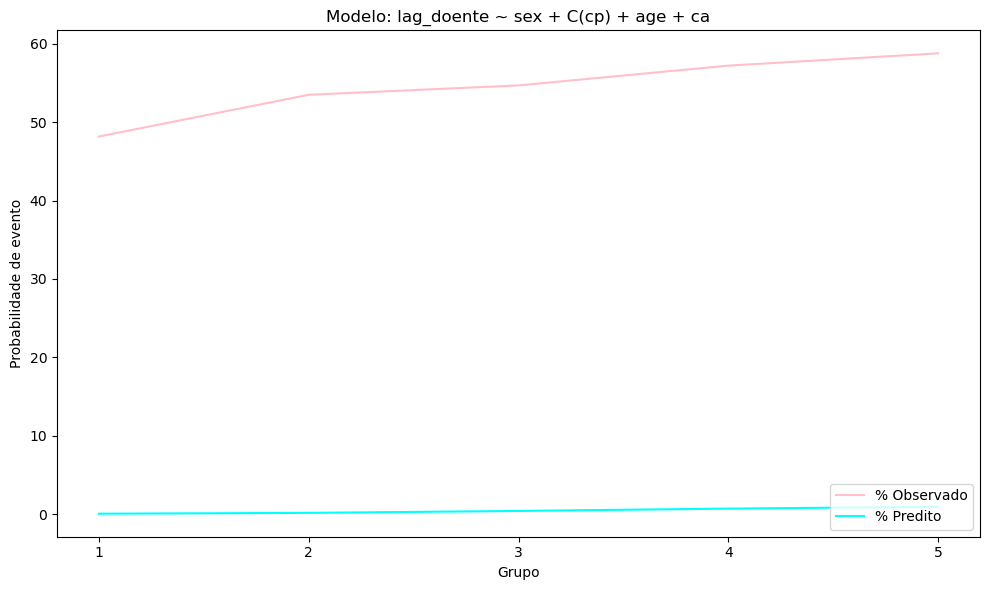

Avaliação do Modelo:
Acurácia: 77.23%
KS: 55.53% 
GINI: 65.27%


In [22]:
modelagem_logit(df, "flag_doente ~ sex + C(cp) + age + ca")

Optimization terminated successfully.
         Current function value: 0.426075
         Iterations 14
Modelo: lag_doente ~ sex + C(cp) + age_mean + ca


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            8
Date:                Sun, 06 Apr 2025   Pseudo R-squ.:                  0.3823
Time:                        04:52:12   Log-Likelihood:                -129.10
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.777e-30
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0576   6.44e+06  -8.94e-09      1.000   -1.26e+07    1.26e+07
C(cp)[T.2.0]    -0.5419    5.2e+05  -1.04e-06      1.000   -1.02e+06    1.02e+06
C(cp)[T.3.0]    -0.4710    2.5e+05  -1.88e-06      1.000   -4.91e+05    4.91e+05
C(cp)[T.4.0]     2.0486    1.7e+04      0.000      1.000   -3.33e+04    3.33e+04
ca[T.1.0]        1.9668      0.405      4.856      0.000       1.173       2.761
ca[T.2.0]        2.3613      0.540      4.372      0.000       1.303       3.420
ca[T.3.0]        2.5360      0.706      3.593      0.000       1.153       3.919
ca[T.?]         -0.1292      1.345     -0.096      0.923      -2.766       2.508
sex              1.4862      0.357      4.157      0.000       0.786       2.187
age_mean        -0.0515   1.15e+05  -4.47e-07      1.000   -2.26e+05    2.26e+05
================================================================================
"""

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,num,flag_doente,trestbps_mean,age_mean,predito,predito2,predito3,predito4
0,63.0,1.0,1.0,145.0,"(230.0, 254.0]",1.0,2.0,150.0,0.0,"(1.5, 2.3]",...,0.0,6.0,0,0,130.912621,55.869565,0.189989,0.178500,0.458229,0.355729
1,67.0,1.0,4.0,160.0,"(254.0, 286.0]",0.0,2.0,108.0,1.0,"(1.0, 1.5]",...,3.0,3.0,2,1,130.912621,55.722222,0.958594,0.884532,0.944123,0.885110
2,67.0,1.0,4.0,120.0,"(204.0, 230.0]",0.0,2.0,129.0,1.0,"(2.3, 6.2]",...,2.0,7.0,1,1,130.912621,55.722222,0.951078,0.884532,0.886566,0.740791
3,37.0,1.0,3.0,130.0,"(230.0, 254.0]",0.0,0.0,187.0,0.0,"(2.3, 6.2]",...,0.0,3.0,0,0,130.912621,53.697674,0.140733,0.248409,0.134929,0.433007
4,41.0,0.0,2.0,130.0,"(125.999, 204.0]",0.0,2.0,172.0,0.0,"(1.0, 1.5]",...,0.0,3.0,0,0,133.340206,51.360000,0.037475,0.025656,0.027278,0.027974


Qual variável deve ser categorizada? age
Em quantos grupos a probabilidade deve ser categorizada? 5


C:\Users\marin\AppData\Local\Temp\ipykernel_29692\788166499.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_reg = df.groupby(cat_pred)


,contagem,predito,pct_
predito,,,
"(0.0347, 0.141]",74,0.084298,51.702703
"(0.141, 0.209]",48,0.170249,52.270833
"(0.209, 0.647]",95,0.503888,53.894737
"(0.647, 0.929]",56,0.859163,58.053571
"(0.929, 0.959]",30,0.953583,59.633333


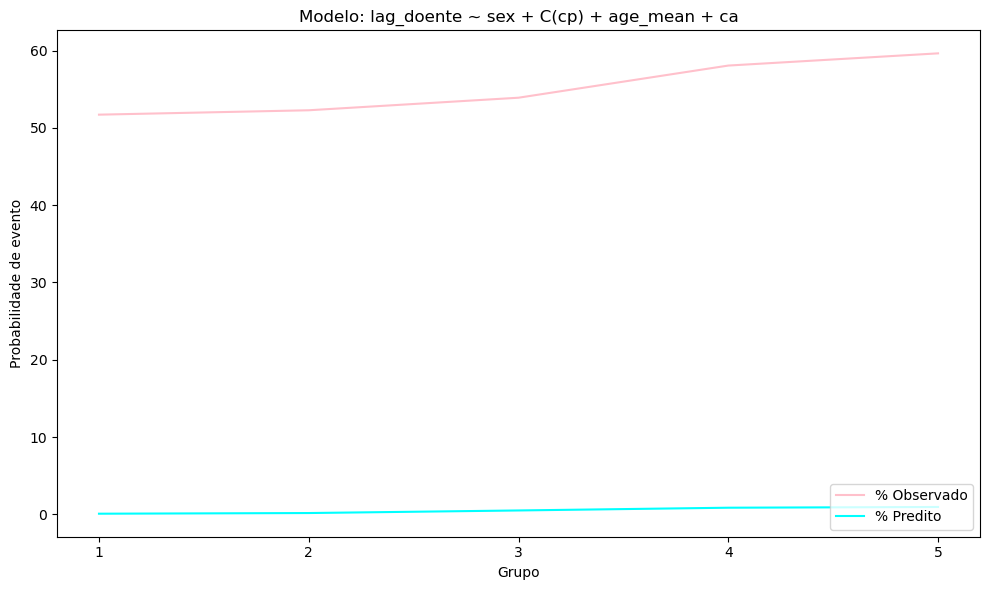

Avaliação do Modelo:
Acurácia: 77.23%
KS: 55.53% 
GINI: 65.27%


In [23]:
modelagem_logit(df, "flag_doente ~ sex + C(cp) + age_mean + ca")